In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import pickle

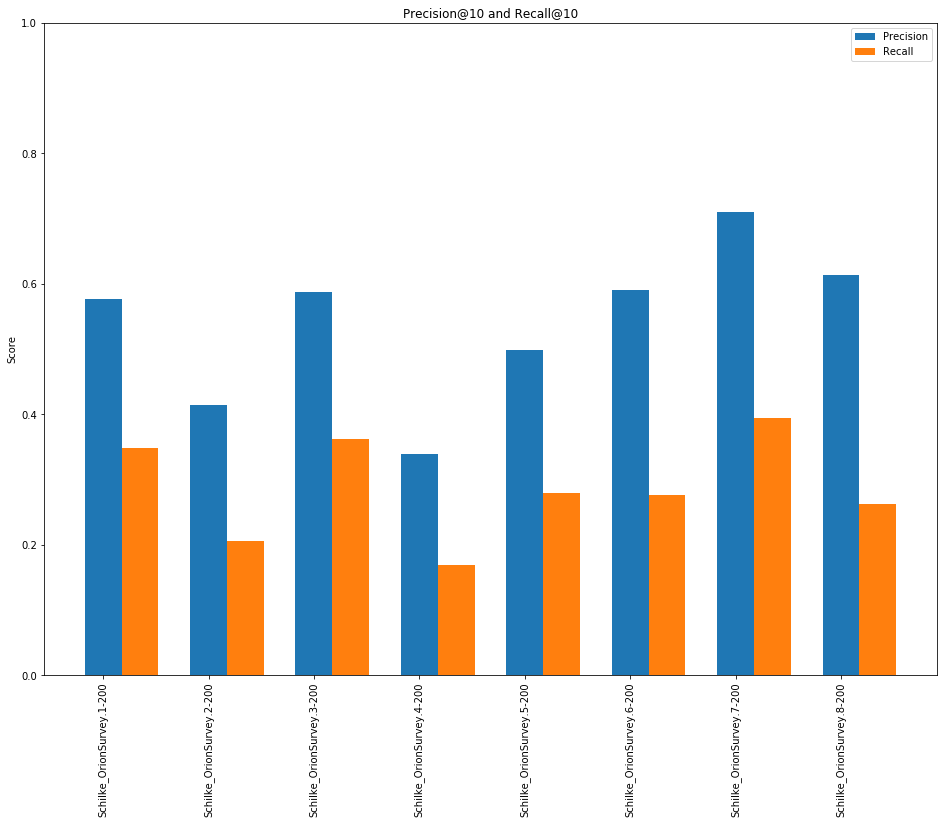

In [2]:
results_avg = []
for i in range(1,9):
    filename = './results_csv/results.p-r.Schilke_OrionSurvey.'+str(i)+'-200.hot_cores_full.csv'
    results = []
    with open(filename) as f:
        for line in f:
            if "Schilke_OrionSurvey" in line:
                tokens = line.split(',')
                results.append((tokens[0],float(tokens[1]),float(tokens[2])))
    precision_list = [x[1] for x in results]
    recall_list = [x[2] for x in results]
    results_avg.append((results[0][0],sum(precision_list)/float(len(precision_list)), sum(recall_list)/float(len(recall_list))))

#print(results_avg)

width = 0.35 # the width of the bars

plt.figure(figsize=(16,12))
#x = range(len(results_avg))
x = np.arange(len(results_avg))
mBarPrecision = plt.bar(x, [i[1] for i in results_avg], width,align='center')
mBarRecall = plt.bar(x+width, [i[2] for i in results_avg], width,align='center')
plt.ylabel('Score')
plt.title("Precision@10 and Recall@10")
plt.xticks(x, ['.'.join(i[0].split(',')[0].split('.')[:2]) for i in results_avg],rotation='vertical')
plt.ylim(0, 1)

plt.legend((mBarPrecision[0], mBarRecall[0]), ('Precision', 'Recall'))
#plt.tight_layout()
plt.show()